In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv("../input/liverpool-ion-switching/train.csv")
test = pd.read_csv("../input/liverpool-ion-switching/test.csv")

In [3]:
train.shape

(5000000, 3)

In [4]:
test.shape

(2000000, 2)

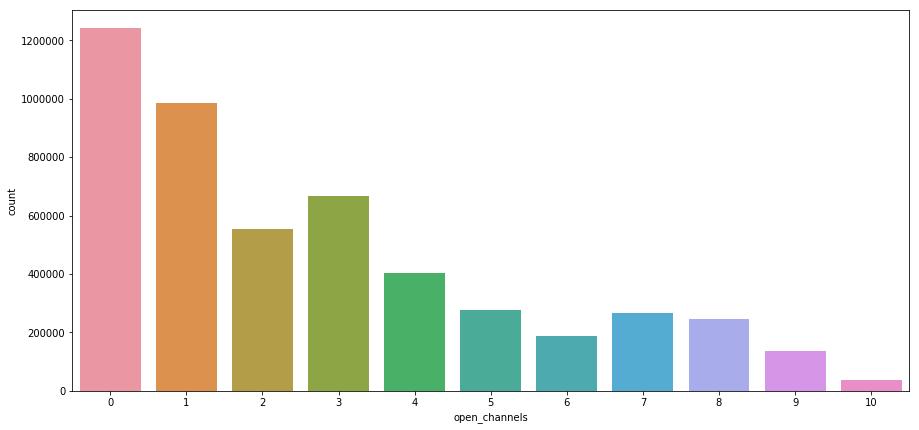

In [5]:
plt.figure(figsize=(15,7))
plt.xlabel("Open Channels")
plt.ylabel("Counts of Open Channel")
sns.countplot(train['open_channels'])

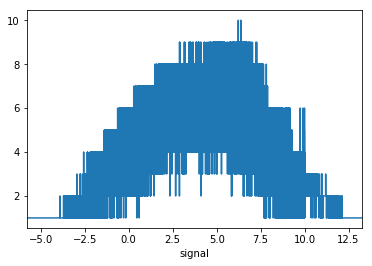

In [6]:
train.groupby('signal')['open_channels'].apply(lambda x: len(set(x))).plot()

In [7]:
X = train[['time', 'signal']].values
y = train['open_channels'].values

In [8]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9444824242424242

In [11]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9575666666666667